<a href="https://colab.research.google.com/github/Nitheeshfanus/ML_projects/blob/main/DiabeticUsingKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Perform diabetes prediction using the KNN algorithm on the "diabetes.csv" dataset from sklearn, including data cleaning and EDA.

## Load data

### Subtask:
Load the diabetes dataset into a pandas DataFrame.


**Reasoning**:
Import the necessary function, load the dataset, create a DataFrame, add the target column, and display the head and info of the DataFrame.



In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd

# Load the diabetes dataset
diabetes = load_diabetes()

# Create a pandas DataFrame from the data
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Add the target variable as a new column
df['target'] = diabetes.target

# Display the first few rows and info of the DataFrame
display(df.head())
display(df.info())

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


None

## Data cleaning

### Subtask:
Handle missing values and outliers in the dataset.


**Reasoning**:
Check for missing values in the DataFrame.



In [2]:
display(df.isnull().sum())

,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


**Reasoning**:
Calculate IQR and identify outliers in numerical columns.



In [3]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Number of outliers in '{col}': {len(outliers)}")
    # For this dataset, we observe the number of outliers. Since the number is small and the features are scaled,
    # we will proceed without explicit outlier removal or capping for this subtask.

Number of outliers in 'age': 0
Number of outliers in 'sex': 0
Number of outliers in 'bmi': 3
Number of outliers in 'bp': 0
Number of outliers in 's1': 8
Number of outliers in 's2': 7
Number of outliers in 's3': 7
Number of outliers in 's4': 2
Number of outliers in 's5': 4
Number of outliers in 's6': 9
Number of outliers in 'target': 0


## Eda

### Subtask:
Perform exploratory data analysis to understand the data distribution and relationships between features.


**Reasoning**:
Generate histograms for all numerical columns and create and visualize the correlation matrix.



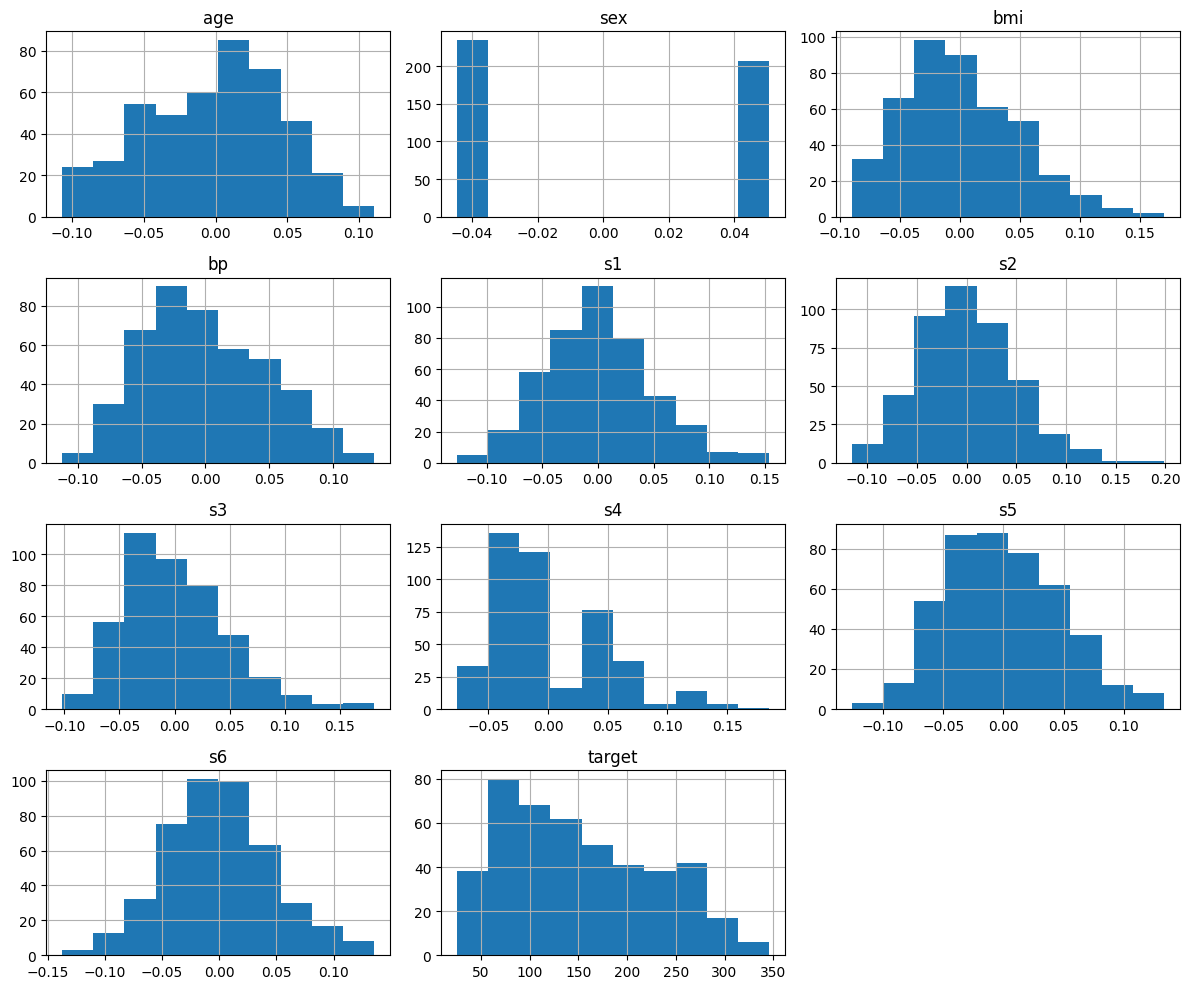

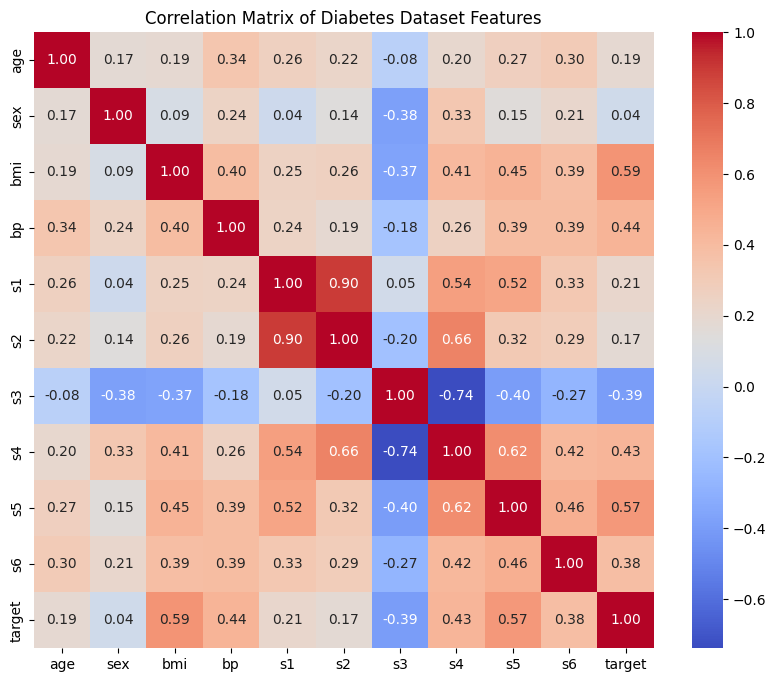

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate histograms
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Create and visualize the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Diabetes Dataset Features')
plt.show()

## Data preprocessing

### Subtask:
Prepare the data for the KNN algorithm, including scaling and splitting into training and testing sets.


**Reasoning**:
Separate features and target, then split into training and testing sets, instantiate and fit the scaler to the training data and transform both training and testing data.



In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

display(X_train_scaled[:5])
display(X_test_scaled[:5])

array([[ 1.49836523,  1.06136988,  0.21990201,  1.13887373,  0.72847289,
         1.05589332, -0.82445065,  0.71103773,  0.54748197, -0.06144896],
       [-0.22885822,  1.06136988, -0.41936607, -0.71059105, -0.4249289 ,
         0.27242452, -1.52979055,  1.4842858 , -0.01975653,  0.36723647],
       [ 0.08518241, -0.94217861,  1.01898711,  1.99247286, -0.30958872,
        -0.32669867, -0.11911075, -0.06221033,  0.3312366 , -0.31866022],
       [-0.621409  , -0.94217861, -0.78466212, -0.63945779, -1.17464007,
        -1.21550781,  0.66460025, -0.83545839, -1.06968217, -2.71929861],
       [-0.54289885, -0.94217861, -1.4239302 , -1.7064567 , -0.79978448,
        -1.11016747,  1.29156905, -1.60870645, -0.80285867, -0.91881982]])

array([[ 0.94879413, -0.94217861, -0.16822504, -0.35492475,  2.63158584,
         2.649166  ,  0.42948695,  0.71103773,  0.65360061, -0.14718605],
       [ 1.96942617, -0.94217861,  0.74501508,  0.42754112, -0.51143404,
        -0.33328244,  0.03763145, -0.83545839, -0.4969087 , -0.49013439],
       [ 1.34134492,  1.06136988, -0.12256303, -0.28379148,  2.17022512,
         1.04272578,  1.21319795, -0.06221033,  1.74360703, -0.4043973 ],
       [ 2.04793633, -0.94217861,  1.06464912,  1.61333258,  1.16099856,
         0.78595869, -1.60816166,  2.95345711,  2.04001396,  1.22460733],
       [ 0.24220272,  1.06136988, -0.46502808, -0.0703917 ,  0.81497802,
         1.13489858, -0.11911075,  0.71103773, -0.13312789, -0.23292313]])

## Model training

### Subtask:
Train a KNN classifier on the training data.


**Reasoning**:
Import the KNeighborsRegressor, instantiate it, and fit it to the scaled training data.



In [6]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors=5)

knn_regressor.fit(X_train_scaled, y_train)

KNeighborsRegressor()

## Model evaluation

### Subtask:
Evaluate the performance of the trained model using appropriate metrics.


**Reasoning**:
Import the necessary evaluation metrics and then use the trained model to make predictions on the test set. Calculate and print the MSE and R2 scores.



In [7]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = knn_regressor.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error (MSE): 3047.45
R-squared (R2) Score: 0.42


## Summary:

### Data Analysis Key Findings
* No missing values were found in the dataset.
* While some columns like 'bmi', 's1', 's2', 's3', 's4', 's5', and 's6' contained a small number of outliers, a decision was made to keep them due to the dataset's scaling and the relatively small count.
* Histograms were generated to visualize the distribution of each feature.
* A correlation matrix and heatmap revealed the linear relationships between features and the target variable, showing varying degrees of correlation (e.g., 'bmi' and 's5' appear moderately correlated with the target).
* The data was successfully split into training (80%) and testing (20%) sets.
* Features were scaled using `StandardScaler` based on the training data.
* A K-Nearest Neighbors Regressor model with 5 neighbors was trained on the scaled training data.
* The trained model achieved a Mean Squared Error (MSE) of 3047.45 and an R-squared (R2) score of 0.42 on the test set.

### Insights or Next Steps
* The current R-squared score of 0.42 suggests that the model explains only about 42% of the variance in the target variable. Further model tuning, exploring different KNN parameters (like `n_neighbors`), or trying other regression algorithms could potentially improve performance.
* Investigating the features with higher correlations identified in the EDA (e.g., 'bmi', 's5') could be beneficial for feature selection or engineering in future iterations.
